In [220]:
import numpy as anp
import pandas as pd
import matplotlib.pyplot as plt

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Billionaires Statistics Dataset.csv')



In [223]:
data3=data.copy()

In [224]:
data2=data.copy()

In [226]:
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [228]:
print(data.isnull().sum())

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [235]:
#do some preprocessing , lets remove special characters
data['gdp_country'] = data['gdp_country'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)
data['gdp_country'] = data['gdp_country'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)
data['gdp_country'] = data['gdp_country'].astype('float')

In [236]:
#remove missing values
def replace_missing(data, column, value):
    data[column].fillna(value, inplace=True)
    return data

In [237]:
#remove missing values
data = replace_missing(data, 'country', 'other')
data = replace_missing(data, 'city', 'other')

In [238]:
#remove missing values
columns_to_fill = ['age', 'gdp_country','life_expectancy_country','tax_revenue_country_country','total_tax_rate_country','latitude_country','longitude_country']
for col in columns_to_fill:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)

In [239]:
#delete the column it contain missing values more the 50%
data=data.drop(columns={'organization'},axis=1)

KeyError: ignored

In [240]:
def missing(data):
    missing_values = data.isnull().sum()
    missing_percent = (missing_values / len(data)) * 100
    return pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing(data)

,Missing_Number,Missing_Percent
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
age,0,0.000000
country,0,0.000000
city,0,0.000000
source,0,0.000000
industries,0,0.000000
countryOfCitizenship,0,0.000000


In [241]:
#now delete unimportant columns
data=data.drop(columns={'title','birthDate','industries','lastName','firstName','date','residenceStateRegion','state','birthYear','birthMonth','birthDay','cpi_country',
                      'cpi_change_country','gross_tertiary_education_enrollment','gross_primary_education_enrollment_country','population_country'},axis=1)

In [242]:
data.head()

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,France,False,U,M,2.715518e+12,82.5,24.2,60.7,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",United States,True,D,M,2.142770e+13,78.5,9.6,36.6,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,United States,True,D,M,2.142770e+13,78.5,9.6,36.6,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,United States,True,U,M,2.142770e+13,78.5,9.6,36.6,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,United States,True,D,M,2.142770e+13,78.5,9.6,36.6,37.090240,-95.712891


In [243]:
from sklearn.preprocessing import PowerTransformer

# here i apply power transformation on my data set and transfor my variables
cols_to_trans = ['rank', 'finalWorth', 'age','gdp_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'latitude_country', 'longitude_country']

# Create a pt Object
powtransobj = PowerTransformer(method='yeo-johnson')

# using for loop
for column in cols_to_trans:
    # Fit the PowerTransformer on the column data
    powtransobj.fit(data[[column]])

    # Transform the column data
    td = powtransobj.transform(data[[column]])

    # Assign the transformed values back to the DataFrame
    data[column] = td

In [244]:
data.head()

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
0,-2.172837,2.440840,Fashion & Retail,Bernard Arnault & family,0.671973,France,Paris,LVMH,France,False,U,M,-0.730615,1.404888,2.043550,1.390694,0.784778,-0.225222
1,-2.165326,2.422334,Automotive,Elon Musk,-1.080668,United States,Austin,"Tesla, SpaceX",United States,True,D,M,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
2,-2.158507,2.358473,Technology,Jeff Bezos,-0.479714,United States,Medina,Amazon,United States,True,D,M,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
3,-2.152162,2.348186,Technology,Larry Ellison,0.983950,United States,Lanai,Oracle,United States,True,U,M,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
4,-2.146169,2.346629,Finance & Investments,Warren Buffett,2.090052,United States,Omaha,Berkshire Hathaway,United States,True,D,M,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302


In [245]:
#use lable encoder for remaining columns
from sklearn.preprocessing import LabelEncoder

# cols to encode
encoded_cols = ['category', 'personName', 'country',
       'city', 'source', 'countryOfCitizenship', 'selfMade',
       'status', 'gender']

# Perform label encoding in a loop
for column in encoded_cols:
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit and transform the column data
    data[column] = le.fit_transform(data[column])

In [246]:
data.head()

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
0,-2.172837,2.440840,4,221,0.671973,24,493,447,22,0,5,1,-0.730615,1.404888,2.043550,1.390694,0.784778,-0.225222
1,-2.165326,2.422334,0,586,-1.080668,74,27,820,73,1,0,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
2,-2.158507,2.358473,16,987,-0.479714,74,400,29,73,1,0,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
3,-2.152162,2.348186,16,1273,0.983950,74,331,588,73,1,5,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
4,-2.146169,2.346629,5,2391,2.090052,74,475,83,73,1,0,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302


In [248]:
#create confusion matrix object
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)
data.cov().style.background_gradient(cmap=cm)

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
rank,1.000379,-0.997399,0.126763,24.499284,-0.139931,-3.341364,10.693597,-1.119308,-3.203723,0.028714,-0.470761,0.003707,-0.043625,-0.039570,0.038990,0.114756,-0.061604,0.176635
finalWorth,-0.997399,1.000379,-0.130690,-25.650010,0.141846,3.362976,-10.595552,1.004414,3.248601,-0.029011,0.472984,-0.002873,0.044907,0.038597,-0.039708,-0.114418,0.058647,-0.178020
category,0.126763,-0.130690,22.394061,23.103356,-0.682562,-2.481912,33.375806,324.195068,-0.695620,0.429856,-1.135932,0.040149,0.792376,0.076762,-0.491314,0.017769,-0.121501,0.019906
personName,24.499284,-25.650010,23.103356,580131.439835,-25.900069,-2673.830527,338.832347,-4637.716704,-2383.192850,32.605028,-60.034997,3.044997,63.363065,-54.183792,-69.386771,96.804007,-28.712780,132.822364
age,-0.139931,0.141846,-0.682562,-25.900069,1.000379,2.889141,-3.005071,-10.506075,4.127566,-0.023456,0.179166,0.014010,-0.059521,0.037480,0.021439,-0.141662,-0.121035,-0.164188
country,-3.341364,3.362976,-2.481912,-2673.830527,2.889141,641.563870,-188.308462,30.304355,566.454471,-0.864842,7.631590,-0.028117,3.687253,3.248467,-2.517915,-17.002941,4.772861,-16.270889
city,10.693597,-10.595552,33.375806,338.832347,-3.005071,-188.308462,43742.412241,942.744531,-293.980100,-0.649116,-23.515177,-0.289520,-7.460381,40.466953,19.255731,5.360787,4.903537,11.469291
source,-1.119308,1.004414,324.195068,-4637.716704,-10.506075,30.304355,942.744531,60506.718112,146.199826,13.821274,-16.904427,4.437944,15.574830,10.811535,2.590981,-0.295146,7.013476,4.598114
countryOfCitizenship,-3.203723,3.248601,-0.695620,-2383.192850,4.127566,566.454471,-293.980100,146.199826,653.975967,-0.455889,7.459167,0.051928,4.041544,2.117104,-2.322503,-14.812858,3.809370,-15.158735
selfMade,0.028714,-0.029011,0.429856,32.605028,-0.023456,-0.864842,-0.649116,13.821274,-0.455889,0.215350,-0.072297,0.051271,0.108306,-0.041553,-0.068258,0.047750,0.027556,0.054537


In [249]:
# find co-relation
data.corr().style.background_gradient(cmap=cm)

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
rank,1.000000,-0.997021,0.026782,0.032159,-0.139878,-0.131893,0.051120,-0.004550,-0.125254,0.061865,-0.210181,0.011103,-0.043608,-0.039555,0.038975,0.114712,-0.061581,0.176569
finalWorth,-0.997021,1.000000,-0.027612,-0.033670,0.141792,0.132746,-0.050651,0.004083,0.127009,-0.062503,0.211174,-0.008607,0.044890,0.038582,-0.039693,-0.114375,0.058625,-0.177953
category,0.026782,-0.027612,1.000000,0.006410,-0.144209,-0.020706,0.033722,0.278508,-0.005748,0.195742,-0.107192,0.025420,0.167410,0.016218,-0.103803,0.003754,-0.025670,0.004206
personName,0.032159,-0.033670,0.006410,1.000000,-0.033998,-0.138596,0.002127,-0.024754,-0.122353,0.092246,-0.035198,0.011978,0.083175,-0.071125,-0.091082,0.127071,-0.037690,0.174352
age,-0.139878,0.141792,-0.144209,-0.033998,1.000000,0.114042,-0.014366,-0.042703,0.161373,-0.050535,0.079993,0.041968,-0.059498,0.037466,0.021431,-0.141608,-0.120989,-0.164126
country,-0.131893,0.132746,-0.020706,-0.138596,0.114042,1.000000,-0.035547,0.004864,0.874509,-0.073577,0.134546,-0.003326,0.145546,0.128226,-0.099389,-0.671153,0.188398,-0.642257
city,0.051120,-0.050651,0.033722,0.002127,-0.014366,-0.035547,1.000000,0.018325,-0.054965,-0.006688,-0.050208,-0.004148,-0.035664,0.193449,0.092051,0.025627,0.023441,0.054828
source,-0.004550,0.004083,0.278508,-0.024754,-0.042703,0.004864,0.018325,1.000000,0.023242,0.121080,-0.030688,0.054055,0.063305,0.043944,0.010531,-0.001200,0.028507,0.018689
countryOfCitizenship,-0.125254,0.127009,-0.005748,-0.122353,0.161373,0.874509,-0.054965,0.023242,1.000000,-0.038415,0.130252,0.006084,0.158010,0.082771,-0.090802,-0.579130,0.148933,-0.592652
selfMade,0.061865,-0.062503,0.195742,0.092246,-0.050535,-0.073577,-0.006688,0.121080,-0.038415,1.000000,-0.069570,0.331024,0.233344,-0.089525,-0.147061,0.102877,0.059368,0.117499


In [250]:
import plotly.express as px  # Interactive visualization library
import plotly.graph_objs as go  # Graph objects for plotly
from plotly.subplots import make_subplots  # Subplots for plotly


#find co-relation using heatmap
fig = px.imshow(data.corr(), text_auto=True, aspect="auto")
fig.show()

In [252]:

# here i group the data with country counts
counts = data2['country'].value_counts()

# Get the corresponding persons for the top 10 countries
top_10_persons = data2[data2['country'].isin(counts.index)]
top_10_persons = top_10_persons[['country', 'age']].drop_duplicates()

# Count the number of males and females in each country
gender_counts = top_10_persons['age'].value_counts()

# Create the bar chart for gender distribution
fig = px.bar(x=gender_counts.index, y=gender_counts.values, labels={'x': 'age', 'y': 'Count'})

# Set the title and axis labels
fig.update_layout(title=' Distribution among Billionaires wrt to age')
# Show the plot
fig.show()

This is preprocessing we have done for data 2

In [253]:
#do some preprocessing , lets remove special characters
data2['gdp_country'] = data2['gdp_country'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)
data2['gdp_country'] = data2['gdp_country'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)
data2['gdp_country'] = data2['gdp_country'].astype('float')

In [254]:
#delete the column it contain missing values more the 50%
data2=data2.drop(columns={'organization'},axis=1)

In [255]:
#now delete unimportant columns
data2=data2.drop(columns={'title','birthDate','industries','lastName','firstName','date','residenceStateRegion','state','birthYear','birthMonth','birthDay','cpi_country',
                      'cpi_change_country','gross_tertiary_education_enrollment','gross_primary_education_enrollment_country','population_country'},axis=1)

In [257]:
#do preprocessing for data 2


from sklearn.preprocessing import PowerTransformer

# here i apply power transformation on my data set and transfor my variables
cols_to_trans = ['rank', 'finalWorth', 'age','gdp_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'latitude_country', 'longitude_country']

# Create a pt Object
powtransobj = PowerTransformer(method='yeo-johnson')

# using for loop
for column in cols_to_trans:
    # Fit the PowerTransformer on the column data
    powtransobj.fit(data2[[column]])

    # Transform the column data
    td = powtransobj.transform(data2[[column]])

    # Assign the transformed values back to the DataFrame
    data2[column] = td



In [258]:
#use lable encoder for remaining columns
from sklearn.preprocessing import LabelEncoder

# cols to encode
encoded_cols = ['category', 'personName', 'country',
       'city', 'source', 'countryOfCitizenship', 'selfMade',
       'status', 'gender']

# Perform label encoding in a loop
for column in encoded_cols:
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit and transform the column data
    data2[column] = le.fit_transform(data[column])

In [259]:
#remove missing values
def replace_missing(data2, column, value):
    data2[column].fillna(value, inplace=True)
    return data2

In [ ]:
#remove missing values
columns_to_fill = ['age', 'gdp_country','life_expectancy_country','tax_revenue_country_country','total_tax_rate_country','latitude_country','longitude_country']
for col in columns_to_fill:
    mean_value = data2[col].mean()
    data2[col] = data2[col].fillna(mean_value)

In [261]:
def missing(data2):
    missing_values = data2.isnull().sum()
    missing_percent = (missing_values / len(data2)) * 100
    return pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing(data2)

,Missing_Number,Missing_Percent
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
age,65,2.462121
country,0,0.000000
city,0,0.000000
source,0,0.000000
countryOfCitizenship,0,0.000000
selfMade,0,0.000000


In [262]:

import pandas as pd


# Choose a protected class variable for analysis (e.g., 'Male')
chosen_protected_class = 'Male'

# Filter the DataFrame based on the chosen protected class variable
subset_df = data[data['gender'] == chosen_protected_class]

# Display the subset DataFrame
print(subset_df)




Empty DataFrame
Columns: [rank, finalWorth, category, personName, age, country, city, source, countryOfCitizenship, selfMade, status, gender, gdp_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, latitude_country, longitude_country]
Index: []


In [263]:
import plotly.express as px

# here i group the data with country counts
counts = data2['country'].value_counts()

# Get the corresponding persons for the top 10 countries
top_10_persons = data2[data2['country'].isin(counts.index)]
top_10_persons = top_10_persons[['country', 'gender']].drop_duplicates()

# Count the number of males and females in each country
gender_counts = top_10_persons['gender'].value_counts()

# Create the bar chart for gender distribution
fig = px.bar(x=gender_counts.index, y=gender_counts.values, labels={'x': 'Gender', 'y': 'Count'})

# Set the title and axis labels
fig.update_layout(title='Weatlth distribution wrt to Gender')
# Show the plot
fig.show()

number of counts of female and male which are self made or not

In [193]:
data["count"] = 1

px.histogram(data.groupby(["selfMade","gender"])["count"].sum().reset_index(),x="gender",y="count",color="selfMade",text_auto=True)


age distibution in data set visualization

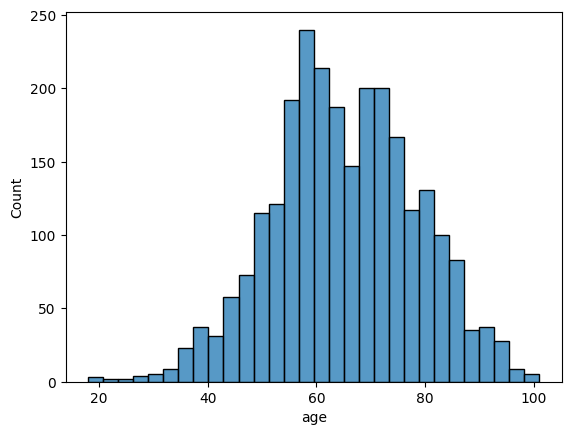

In [265]:
# Visualizing age distribution
import seaborn as sns
sns.histplot(data3, x='age')

# Visualizing age distribution using Plotly
import plotly.express as px
fig = px.histogram(data3, x="age")
fig.show()

ratio of male and female with respect to dependent variable selfmade

In [266]:
labels = data["selfMade"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            textfont_size=20,
            marker=dict()
        )
    ]
)
fig.update(layout_title_text='Percentage of Selfmade or Not in the list of Billionaires',
           layout_showlegend=False)

fig.show()

In [267]:
#here in my DATA1 i choose "final worth" as my dependent variable.
# so first i have to discretize this y variable
# Replace 'no_OF_BINS' with the desired number of bins
no_of_bins = 5
# Use the cut function to discretize the variable
data['finalWorth'] = pd.cut(data['finalWorth'], bins=no_of_bins, labels=False)

Text(0.5, 0, 'finalWorth')

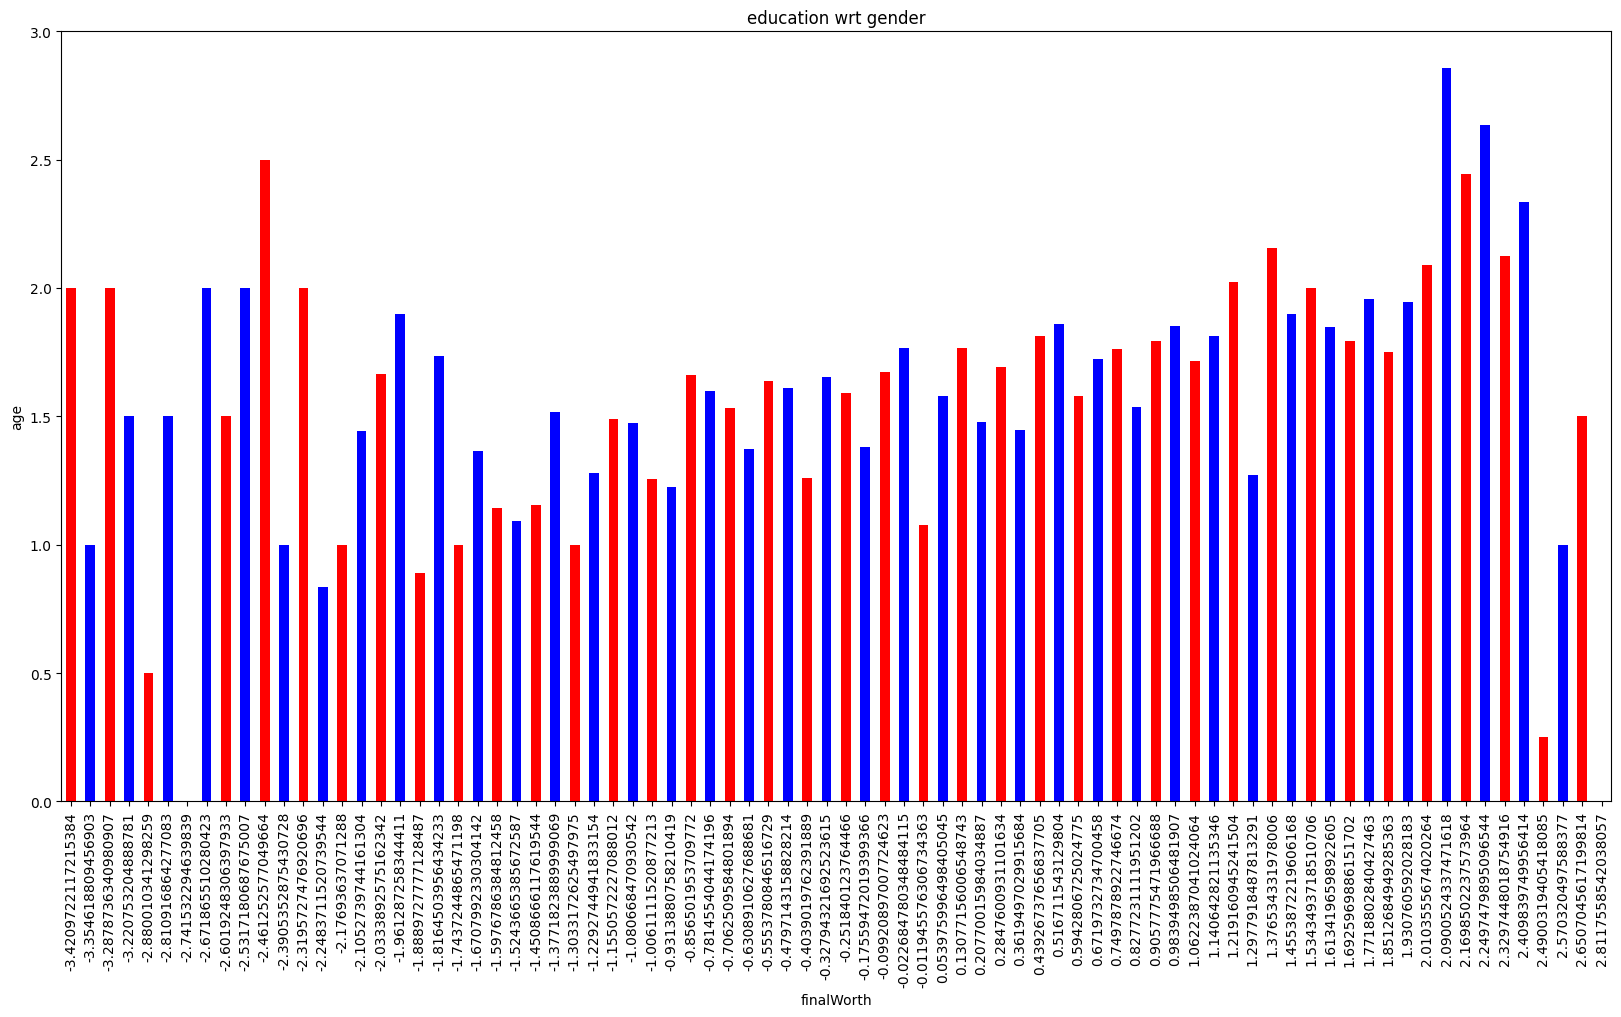

In [268]:
# step 2 of task
# now group the protected class variable with repect to their categories eg. variable= education, catgegories= ...........
# in this part we explore the demographic by grouping the protected class categories
#Set up the figure
plt.figure(figsize=(20,10))

# i Plot the  distribution of income with respect gender categories
data.groupby('age')['finalWorth'].mean().plot(kind='bar', color=['red', 'blue'])
plt.title('education wrt gender')
plt.ylabel('age')
plt.xlabel('finalWorth')

In [269]:
#here i do some preprocessing with data2 to use it for bias mitigation
# data stanadrization
from sklearn.preprocessing import PowerTransformer

# here i apply power transformation on my data set and transfor my variables
cols_to_trans = ['rank', 'finalWorth', 'age','gdp_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'latitude_country', 'longitude_country']

# Create a pt Object
powtransobj = PowerTransformer(method='yeo-johnson')

# using for loop
for column in cols_to_trans:
    # Fit the PowerTransformer on the column data
    powtransobj.fit(data[[column]])

    # Transform the column data
    td = powtransobj.transform(data2[[column]])

    # Assign the transformed values back to the DataFrame
    data2[column] = td

In [270]:
data2.head()

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
0,-1.759175,0.654443,4,221,0.665785,24,493,447,22,0,5,1,-0.861725,1.322766,1.738861,1.339820,0.730396,-0.239466
1,-1.754880,0.642756,0,586,-1.068532,74,27,820,73,1,0,1,1.042243,0.000173,-0.453776,-0.573047,-0.082150,-1.202941
2,-1.750977,0.602165,16,987,-0.470217,74,400,29,73,1,0,1,1.042243,0.000173,-0.453776,-0.573047,-0.082150,-1.202941
3,-1.747341,0.595588,16,1273,0.971238,74,331,588,73,1,5,1,1.042243,0.000173,-0.453776,-0.573047,-0.082150,-1.202941
4,-1.743904,0.594592,5,2391,2.049081,74,475,83,73,1,0,1,1.042243,0.000173,-0.453776,-0.573047,-0.082150,-1.202941


In [271]:
pip install fairlearn

In [272]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [273]:
from sklearn.model_selection import train_test_split
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity, ErrorRate

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd


calculate fairness of protected class variable "gender" in dataset

In [274]:
pcc= 'gender'

# Identify unique values in the protected class variable
protected_classes = data[pcc].unique()

# Define a function to identify privileged and unprivileged groups
def identify_privileged_unprivileged(data, pcc, protected_class_value):
    privileged_group = data[data[pcc] == protected_class_value]
    unprivileged_group = data[data[pcc] != protected_class_value]
    return privileged_group, unprivileged_group

for protected_class_value in protected_classes:
    privileged_group, unprivileged_group = identify_privileged_unprivileged(data2, pcc, protected_class_value)


    print(f'Protected Class Value: {protected_class_value}')
    print(f'Privileged Group Size: {len(privileged_group)}')
    print(f'Unprivileged Group Size: {len(unprivileged_group)}')
    print('\n')

Protected Class Value: 1
Privileged Group Size: 2303
Unprivileged Group Size: 337


Protected Class Value: 0
Privileged Group Size: 337
Unprivileged Group Size: 2303




calculate fairness of protected class variable age in dataset

In [275]:
pcc= 'age'

# Identify unique values in the protected class variable
protected_classes = data2[pcc].unique()

# Define a function to identify privileged and unprivileged groups
def identify_privileged_unprivileged(data2, pcc, protected_class_value):
    privileged_group = data2[data2[pcc] == protected_class_value]
    unprivileged_group = data2[data2[pcc] != protected_class_value]
    return privileged_group, unprivileged_group

for protected_class_value in protected_classes:
    privileged_group, unprivileged_group = identify_privileged_unprivileged(data2, pcc, protected_class_value)


    print(f'Protected Class Value: {protected_class_value}')
    print(f'Privileged Group Size: {len(privileged_group)}')
    print(f'Unprivileged Group Size: {len(unprivileged_group)}')
    print('\n')

Protected Class Value: 0.6657848758656489
Privileged Group Size: 58
Unprivileged Group Size: 2582


Protected Class Value: -1.068531821710301
Privileged Group Size: 38
Unprivileged Group Size: 2602


Protected Class Value: -0.47021741194803096
Privileged Group Size: 82
Unprivileged Group Size: 2558


Protected Class Value: 0.9712382502944572
Privileged Group Size: 54
Unprivileged Group Size: 2586


Protected Class Value: 2.049080828569365
Privileged Group Size: 7
Unprivileged Group Size: 2633


Protected Class Value: 0.13384906929969476
Privileged Group Size: 73
Unprivileged Group Size: 2567


Protected Class Value: 1.2010601966372956
Privileged Group Size: 42
Unprivileged Group Size: 2598


Protected Class Value: 1.354623995684058
Privileged Group Size: 32
Unprivileged Group Size: 2608


Protected Class Value: -0.017566725734876748
Privileged Group Size: 69
Unprivileged Group Size: 2571


Protected Class Value: 0.28550506640987006
Privileged Group Size: 62
Unprivileged Group Size: 257

Calculate fairness metric with respect to our protected class that is age

In [276]:
#Here we calculate fairness metric for our gender class with respect to our two dependent variables finaworth and selfmade
# we can also do this with respect to gender

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
protected_class_column ='age'

threshold=0.4
# select two dependent variables
dependent_variable1 = 'finalWorth'
dependent_variable2 = 'selfMade'
def compute_fairness_metrics(group):
    # Check if there are instances in the group
    if len(group) == 0:
        return 0, 0

    y_true = group[dependent_variable1] > threshold
    y_pred = group[dependent_variable2] > threshold

    confusion_mat = confusion_matrix(y_true, y_pred)

    # Check for correct dimensions of the confusion matrix
    if confusion_mat.shape[0] < 2 or confusion_mat.shape[1] < 2:
        # Handle or skip this case
        return 0, 0

    # Check for zero denominators
    if sum(confusion_mat[0, :]) == 0 or sum(confusion_mat[1, :]) == 0 or confusion_mat[0, 0] == 0:
        # Handle or skip this case
        return 0, 0

    spd = abs(confusion_mat[0, 1] / sum(confusion_mat[0, :]) - confusion_mat[1, 1] / sum(confusion_mat[1, :]))

    # Check for zero denominator in EOD calculation
    if confusion_mat[0, 0] == 0 or confusion_mat[1, 0] == 0:
        # Handle or skip this case
        return spd, 0

    eod = abs(confusion_mat[0, 1] / confusion_mat[0, 0] - confusion_mat[1, 1] / confusion_mat[1, 0])

    return spd, eod



    # Statistialcal Parity Difference (SPD)
    spd = abs(confusion_mat[0, 1] / sum(confusion_mat[0, :]) - confusion_mat[1, 1] / sum(confusion_mat[1, :]))

    # Equal Opportunity Difference (EOD)
    eod = abs(confusion_mat[0, 1] / confusion_mat[0, 0] - confusion_mat[1, 1] / confusion_mat[1, 0])

    return spd, eod

# Iterate through each unique value in the protected class variable
for protected_class_value in data2[protected_class_column].unique():
    privileged_group = data2[data2[protected_class_column] == protected_class_value]
    unprivileged_group = data2[data2[protected_class_column] != protected_class_value]

    print(f'Protected Class Value: {protected_class_value}')

    # Compute fairness metrics for dependent_variable1
    spd_dep_var1_privileged, eod_dep_var1_privileged = compute_fairness_metrics(privileged_group)
    spd_dep_var1_unprivileged, eod_dep_var1_unprivileged = compute_fairness_metrics(unprivileged_group)

    print(f'Fairness Metrics for {dependent_variable1}:')
    print(f'SPD for Privileged Group: {spd_dep_var1_privileged}')
    print(f'SPD for Unprivileged Group: {spd_dep_var1_unprivileged}')
    print(f'EOD for Privileged Group: {eod_dep_var1_privileged}')
    print(f'EOD for Unprivileged Group: {eod_dep_var1_unprivileged}')

    # Compute fairness metrics for dependent_variable2
    spd_dep_var2_privileged, eod_dep_var2_privileged = compute_fairness_metrics(privileged_group)
    spd_dep_var2_unprivileged, eod_dep_var2_unprivileged = compute_fairness_metrics(unprivileged_group)

    print(f'Fairness Metrics for {dependent_variable2}:')
    print(f'SPD for Privileged Group: {spd_dep_var2_privileged}')
    print(f'SPD for Unprivileged Group: {spd_dep_var2_unprivileged}')
    print(f'EOD for Privileged Group: {eod_dep_var2_privileged}')
    print(f'EOD for Unprivileged Group: {eod_dep_var2_unprivileged}')

    print('\n')


# Iterate through each unique value in the protected class variable
for protected_class_value in data[pcc].unique():
    privileged_group = data[data[pcc] == protected_class_value]
    unprivileged_group = data[data[pcc] != protected_class_value]

    print(f'Protected Class Value: {protected_class_value}')

    # Compute fairness metrics for dependent_variable1
    spd_dep_var1_privileged, eod_dep_var1_privileged = compute_fairness_metrics(privileged_group)
    spd_dep_var1_unprivileged, eod_dep_var1_unprivileged = compute_fairness_metrics(unprivileged_group)

    print(f'Fairness Metrics for {dependent_variable1}:')
    print(f'SPD for Privileged Group: {spd_dep_var1_privileged}')
    print(f'SPD for Unprivileged Group: {spd_dep_var1_unprivileged}')
    print(f'EOD for Privileged Group: {eod_dep_var1_privileged}')
    print(f'EOD for Unprivileged Group: {eod_dep_var1_unprivileged}')

    # Compute fairness metrics for dependent_variable2
    spd_dep_var2_privileged, eod_dep_var2_privileged = compute_fairness_metrics(privileged_group)
    spd_dep_var2_unprivileged, eod_dep_var2_unprivileged = compute_fairness_metrics(unprivileged_group)

    print(f'Fairness Metrics for {dependent_variable2}:')
    print(f'SPD for Privileged Group: {spd_dep_var2_privileged}')
    print(f'SPD for Unprivileged Group: {spd_dep_var2_unprivileged}')
    print(f'EOD for Privileged Group: {eod_dep_var2_privileged}')
    print(f'EOD for Unprivileged Group: {eod_dep_var2_unprivileged}')

    print('\n')

Protected Class Value: 0.6657848758656489
Fairness Metrics for finalWorth:
SPD for Privileged Group: 0.43518518518518523
SPD for Unprivileged Group: 0.08302300562727571
EOD for Privileged Group: 1.8431372549019607
EOD for Unprivileged Group: 0.6747372845733499
Fairness Metrics for selfMade:
SPD for Privileged Group: 0.43518518518518523
SPD for Unprivileged Group: 0.08302300562727571
EOD for Privileged Group: 1.8431372549019607
EOD for Unprivileged Group: 0.6747372845733499


Protected Class Value: -1.068531821710301
Fairness Metrics for finalWorth:
SPD for Privileged Group: 0.2777777777777778
SPD for Unprivileged Group: 0.13774395003903195
EOD for Privileged Group: 0
EOD for Unprivileged Group: 0.9802777777777778
Fairness Metrics for selfMade:
SPD for Privileged Group: 0.2777777777777778
SPD for Unprivileged Group: 0.13774395003903195
EOD for Privileged Group: 0
EOD for Unprivileged Group: 0.9802777777777778


Protected Class Value: -0.47021741194803096
Fairness Metrics for finalWorth:

In [277]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
protected_class_column ='gender'

# select two dependent variables
dependent_variable1 = 'finalWorth'
dependent_variable2 = 'selfMade'

# using
threshold = 0.4

# Define a function to compute fairness metrics
def compute_fairness_metrics(group):
    # Binary classification case, you may need to adjust for multi-class classification
    y_true = group[dependent_variable1] > threshold
    y_pred = group[dependent_variable2] > threshold

    # Confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Statistialcal Parity Difference (SPD)
    spd = abs(confusion_mat[0, 1] / sum(confusion_mat[0, :]) - confusion_mat[1, 1] / sum(confusion_mat[1, :]))

    # Equal Opportunity Difference (EOD)
    eod = abs(confusion_mat[0, 1] / confusion_mat[0, 0] - confusion_mat[1, 1] / confusion_mat[1, 0])

    return spd, eod

# Iterate through each unique value in the protected class variable
for protected_class_value in data2[protected_class_column].unique():
    privileged_group = data2[data2[protected_class_column] == protected_class_value]
    unprivileged_group = data2[data2[protected_class_column] != protected_class_value]

    print(f'Protected Class Value: {protected_class_value}')

    # Compute fairness metrics for dependent_variable1
    spd_dep_var1_privileged, eod_dep_var1_privileged = compute_fairness_metrics(privileged_group)
    spd_dep_var1_unprivileged, eod_dep_var1_unprivileged = compute_fairness_metrics(unprivileged_group)

    print(f'Fairness Metrics for {dependent_variable1}:')
    print(f'SPD for Privileged Group: {spd_dep_var1_privileged}')
    print(f'SPD for Unprivileged Group: {spd_dep_var1_unprivileged}')
    print(f'EOD for Privileged Group: {eod_dep_var1_privileged}')
    print(f'EOD for Unprivileged Group: {eod_dep_var1_unprivileged}')

    # Compute fairness metrics for dependent_variable2
    spd_dep_var2_privileged, eod_dep_var2_privileged = compute_fairness_metrics(privileged_group)
    spd_dep_var2_unprivileged, eod_dep_var2_unprivileged = compute_fairness_metrics(unprivileged_group)

    print(f'Fairness Metrics for {dependent_variable2}:')
    print(f'SPD for Privileged Group: {spd_dep_var2_privileged}')
    print(f'SPD for Unprivileged Group: {spd_dep_var2_unprivileged}')
    print(f'EOD for Privileged Group: {eod_dep_var2_privileged}')
    print(f'EOD for Unprivileged Group: {eod_dep_var2_unprivileged}')

    print('\n')

Protected Class Value: 1
Fairness Metrics for finalWorth:
SPD for Privileged Group: 0.09804155435223394
SPD for Unprivileged Group: 0.2891566265060241
EOD for Privileged Group: 1.1015813454837846
EOD for Unprivileged Group: 0.4067796610169492
Fairness Metrics for selfMade:
SPD for Privileged Group: 0.09804155435223394
SPD for Unprivileged Group: 0.2891566265060241
EOD for Privileged Group: 1.1015813454837846
EOD for Unprivileged Group: 0.4067796610169492


Protected Class Value: 0
Fairness Metrics for finalWorth:
SPD for Privileged Group: 0.2891566265060241
SPD for Unprivileged Group: 0.09804155435223394
EOD for Privileged Group: 0.4067796610169492
EOD for Unprivileged Group: 1.1015813454837846
Fairness Metrics for selfMade:
SPD for Privileged Group: 0.2891566265060241
SPD for Unprivileged Group: 0.09804155435223394
EOD for Privileged Group: 0.4067796610169492
EOD for Unprivileged Group: 1.1015813454837846




In [278]:
#pip install tempeh

In [279]:
from sklearn import preprocessing


def number_encode_features(df):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].fillna("None"))
    return result, encoders

In [280]:
# Select ratio
ratio = 0.75

total_rows = data.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
train = data[0:train_size]
test = data[train_size:]
# print train set
print("Train dataframe")
print(train)

Train dataframe
          rank  finalWorth  category  personName       age  country  city  \
0    -2.172837           4         4         221  0.671973       24   493   
1    -2.165326           4         0         586 -1.080668       74    27   
2    -2.158507           4        16         987 -0.479714       74   400   
3    -2.152162           4        16        1273  0.983950       74   331   
4    -2.146169           4         5        2391  2.090052       74   475   
...        ...         ...       ...         ...       ...      ...   ...   
1975  0.835315           1         4        1179 -1.303317       64   614   
1976  0.835315           1         6        1602 -0.781455       74   694   
1977  0.835315           1         6         554  0.053976       74   484   
1978  0.835315           1        13        1230 -1.961287       59   595   
1979  0.835315           1         5         300 -0.175595       52   353   

      source  countryOfCitizenship  selfMade  status  gende

In [281]:
train.head()

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,status,gender,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
0,-2.172837,4,4,221,0.671973,24,493,447,22,0,5,1,-0.730615,1.404888,2.043550,1.390694,0.784778,-0.225222
1,-2.165326,4,0,586,-1.080668,74,27,820,73,1,0,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
2,-2.158507,4,16,987,-0.479714,74,400,29,73,1,0,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
3,-2.152162,4,16,1273,0.983950,74,331,588,73,1,5,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302
4,-2.146169,4,5,2391,2.090052,74,475,83,73,1,0,1,0.976222,-0.019035,-0.544041,-0.601140,0.035453,-1.243302


In [282]:
pip install fairlearn

In [283]:
import fairlearn

In [284]:
pip install aif360

apply a model Decision Tree regressor on our orignal data set

In [285]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Select fairness metrics and compute baseline metrics
X = data.drop(['selfMade'], axis=1)  # Replace 'target_variable' with your actual target variable
y = data['selfMade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree regressor (for regression problems)
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.27


Step 5: Applying bias mitigation algorithim and check fairness again


In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

# Identify privileged/unprivileged groups for age and gender
privileged_groups = [{'age': data['age'].max(), 'gender': 1}]  # Assuming the maximum age is privileged, '1' is privileged for gender
unprivileged_groups = [{'age': data['age'].min(), 'gender': 0}]  # Assuming the minimum age is unprivileged, '0' is unprivileged for gender

# Select features and target variable
X = data.drop(['country'], axis=1)  # Replace 'country' with your actual target variable
y = data['country']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create BinaryLabelDataset from a pandas DataFrame
privileged_condition = (X_train['gender'] == privileged_groups[0]['gender']) & (X_train['age'] == privileged_groups[0]['age'])
unprivileged_condition = (X_train['gender'] == unprivileged_groups[0]['gender']) & (X_train['age'] == unprivileged_groups[0]['age'])

privileged_indices = privileged_condition[privileged_condition].index
unprivileged_indices = unprivileged_condition[unprivileged_condition].index

privileged_df = X_train.loc[privileged_indices].assign(y=y_train.loc[privileged_indices])
unprivileged_df = X_train.loc[unprivileged_indices].assign(y=y_train.loc[unprivileged_indices])

# Set favorable and unfavorable labels based on your specific task
favorable_label = 1  # Replace with your favorable label
unfavorable_label = 0  # Replace with your unfavorable label

# Convert labels to binary
le = preprocessing.LabelEncoder()
privileged_df['y'] = le.fit_transform(privileged_df['y'])
unprivileged_df['y'] = le.transform(unprivileged_df['y'])

privileged_bld = BinaryLabelDataset(df=privileged_df, label_names=['y'], protected_attribute_names=['age', 'gender'], favorable_label=favorable_label, unfavorable_label=unfavorable_label)
unprivileged_bld = BinaryLabelDataset(df=unprivileged_df, label_names=['y'], protected_attribute_names=['age', 'gender'], favorable_label=favorable_label, unfavorable_label=unfavorable_label)

# Train a model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Calculate baseline metrics
y_pred = model.predict(X_test)

privileged_metrics = BinaryLabelDatasetMetric(privileged_bld, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
unprivileged_metrics = BinaryLabelDatasetMetric(unprivileged_bld, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

print("Baseline Metrics for Privileged Group:")
print("Mean difference:", privileged_metrics.mean_difference())
print("Disparate Impact:", privileged_metrics.disparate_impact())
print()

print("Baseline Metrics for Unprivileged Group:")
print("Mean difference:", unprivileged_metrics.mean_difference())
print("Disparate Impact:", unprivileged_metrics.disparate_impact())
print()

# Apply reweighing pre-processing algorithm
reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
transformed_dataset = reweighing.fit_transform(privileged_bld)

# Train a new model on the transformed dataset
X_train_transformed = transformed_dataset.features
y_train_transformed = transformed_dataset.labels.ravel()

model_transformed = RandomForestClassifier(random_state=42)
model_transformed.fit(X_train_transformed, y_train_transformed)

# Evaluate the model on the original test set
y_pred_transformed = model_transformed.predict(X_test)

# Calculate metrics after mitigation
privileged_metrics_transformed = BinaryLabelDatasetMetric(privileged_bld, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
unprivileged_metrics_transformed = BinaryLabelDatasetMetric(unprivileged_bld, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

print("Metrics for Privileged Group After Mitigation:")
print("Mean difference:", privileged_metrics_transformed.mean_difference())
print("Disparate Impact:", privileged_metrics_transformed.disparate_impact())
print()

print("Metrics for Unprivileged Group After Mitigation:")
print("Mean difference:", unprivileged_metrics_transformed.mean_difference())
print("Disparate Impact:", unprivileged_metrics_transformed.disparate_impact())
print()


Baseline Metrics for Privileged Group:
Mean difference: nan
Disparate Impact: nan

Baseline Metrics for Unprivileged Group:
Mean difference: nan
Disparate Impact: nan



/usr/local/lib/python3.10/dist-packages/aif360/metrics/binary_label_dataset_metric.py:105: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:66: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:69: RuntimeWarning:

invalid value encountered in double_scalars



Metrics for Privileged Group After Mitigation:
Mean difference: nan
Disparate Impact: nan

Metrics for Unprivileged Group After Mitigation:
Mean difference: nan
Disparate Impact: nan



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/aif360/metrics/binary_label_dataset_metric.py:105: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
print("Size of privileged condition indices:", len(privileged_indices))
print("Size of unprivileged condition indices:", len(unprivileged_indices))
